In [23]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts

In [24]:
fileId = '0022'

In [25]:
filepath = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
    fileId)

In [26]:
img_nib = nib.load(filepath)

In [27]:
img_np =img_nib.get_fdata()

In [28]:
img_np.shape

(512, 512, 89)

In [29]:
img_np.size

23330816

In [30]:
img_np.dtype

dtype('float64')

In [31]:
img_np.max(), img_np.min(), img_np.mean(), np.median(img_np)

(2585.0, -3024.0, -965.9304467962029, -879.0)

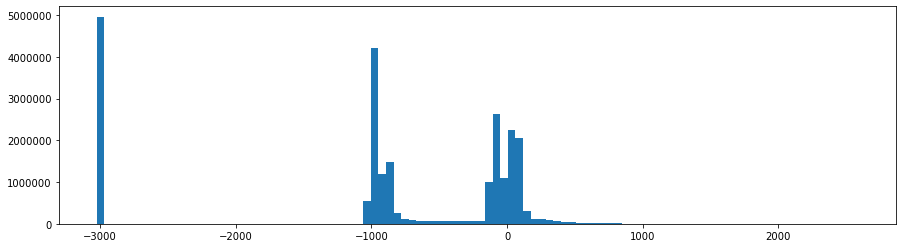

In [32]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [33]:
lower_bound = -500

In [34]:
img_np[img_np>300]=lower_bound
img_np[img_np<-100]=lower_bound

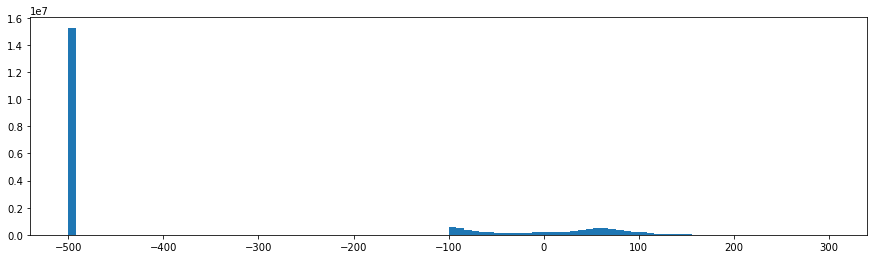

In [35]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [36]:
img_np_norm = (img_np-img_np.min())/(img_np.max()-img_np.min())

In [37]:
img_np_norm.max(), img_np_norm.min(), img_np_norm.mean(), np.median(img_np_norm)

(1.0, 0.0, 0.22448528080843805, 0.0)

In [38]:
img_np_norm_tr=img_np_norm.transpose((2,0,1))

In [39]:
filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
label_nib = nib.load(filepath_label)

In [40]:
label_np = label_nib.get_fdata()

In [41]:
label_np.shape

(512, 512, 89)

In [42]:
label_np.max(), label_np.min(), np.unique(label_np.ravel())

(13.0,
 0.0,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [43]:
label_np_tr = label_np.transpose((2,0,1))
label_np_tr.shape

(89, 512, 512)

50


d:\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


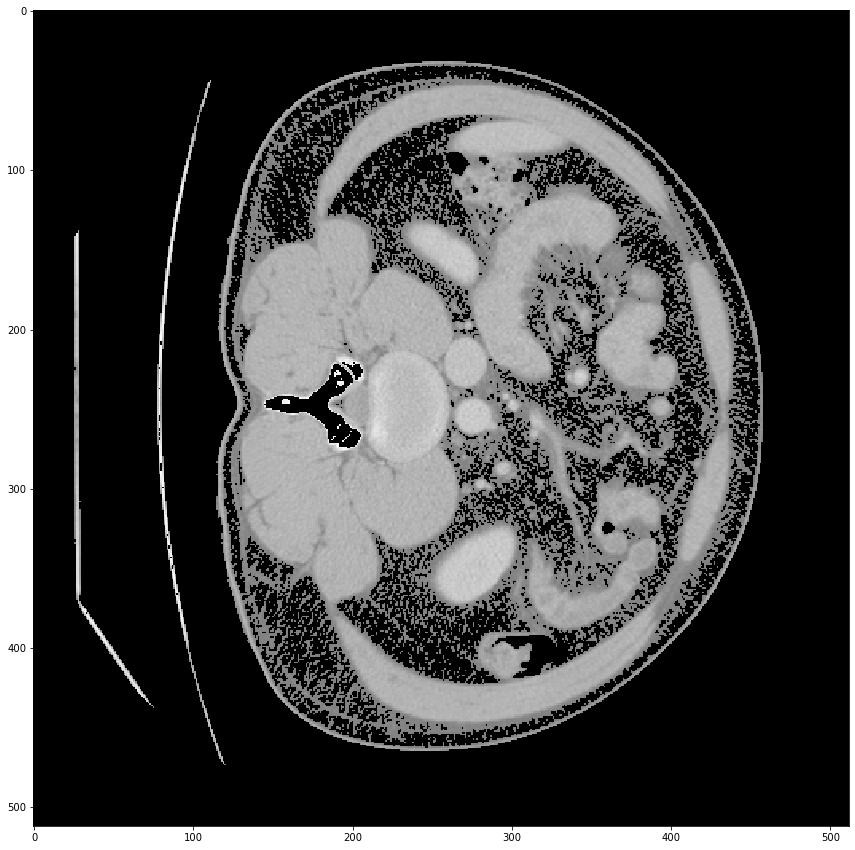

51


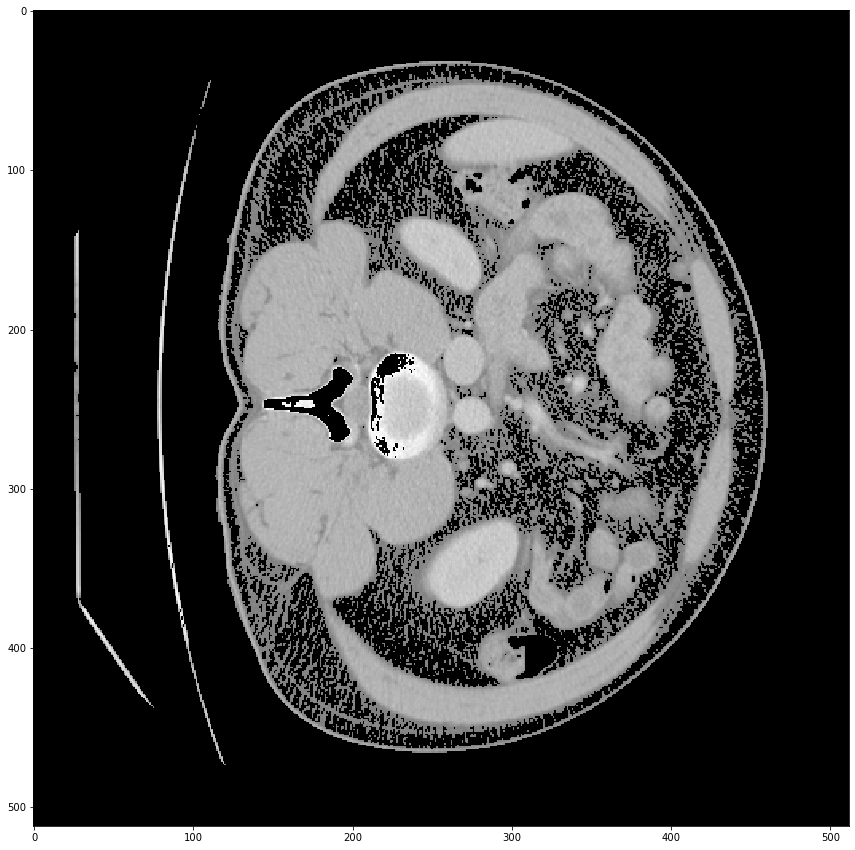

52


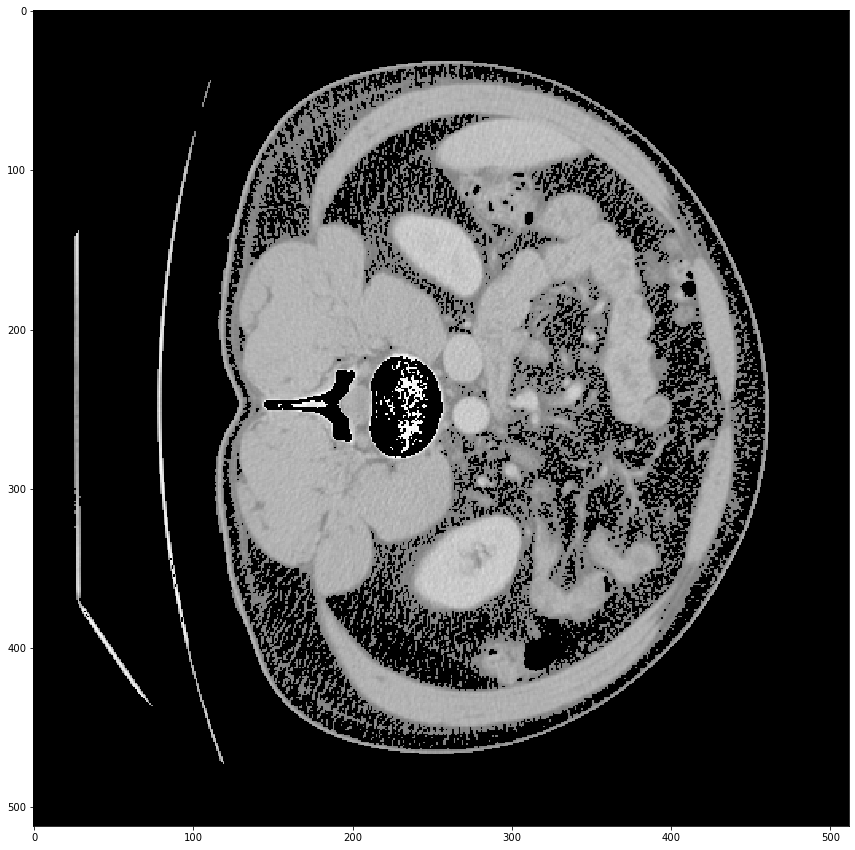

53


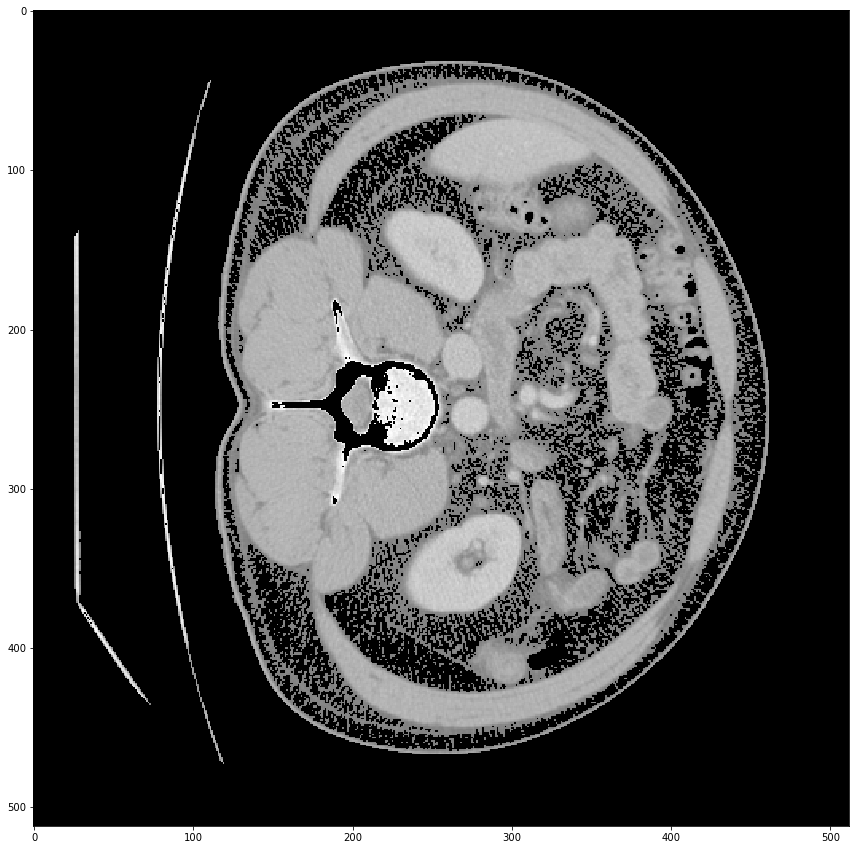

54


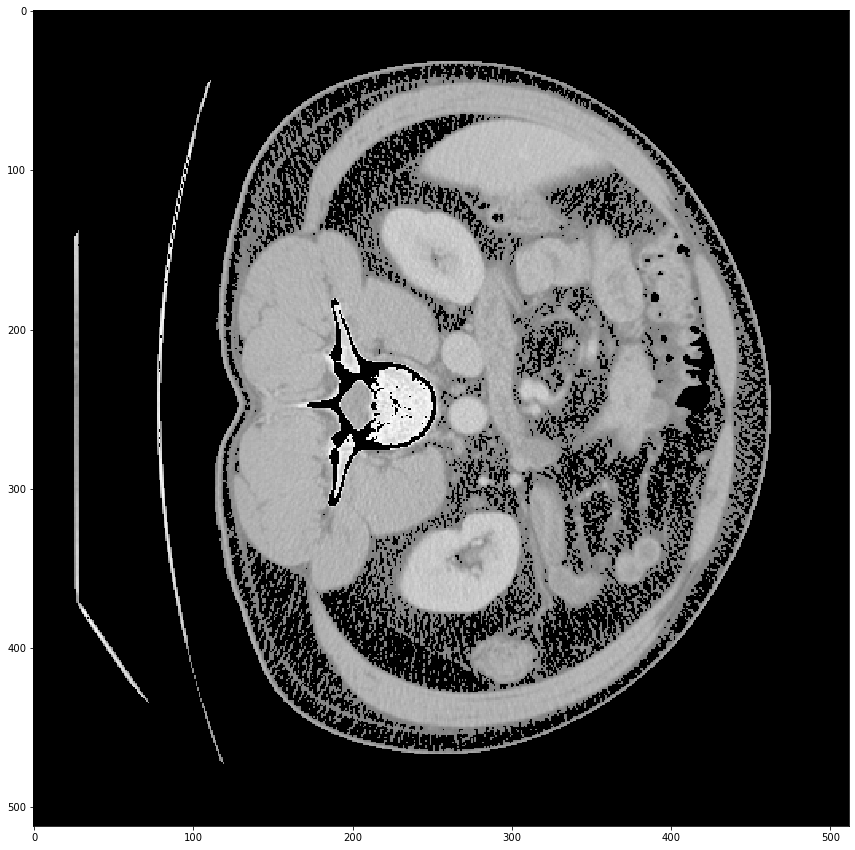

55


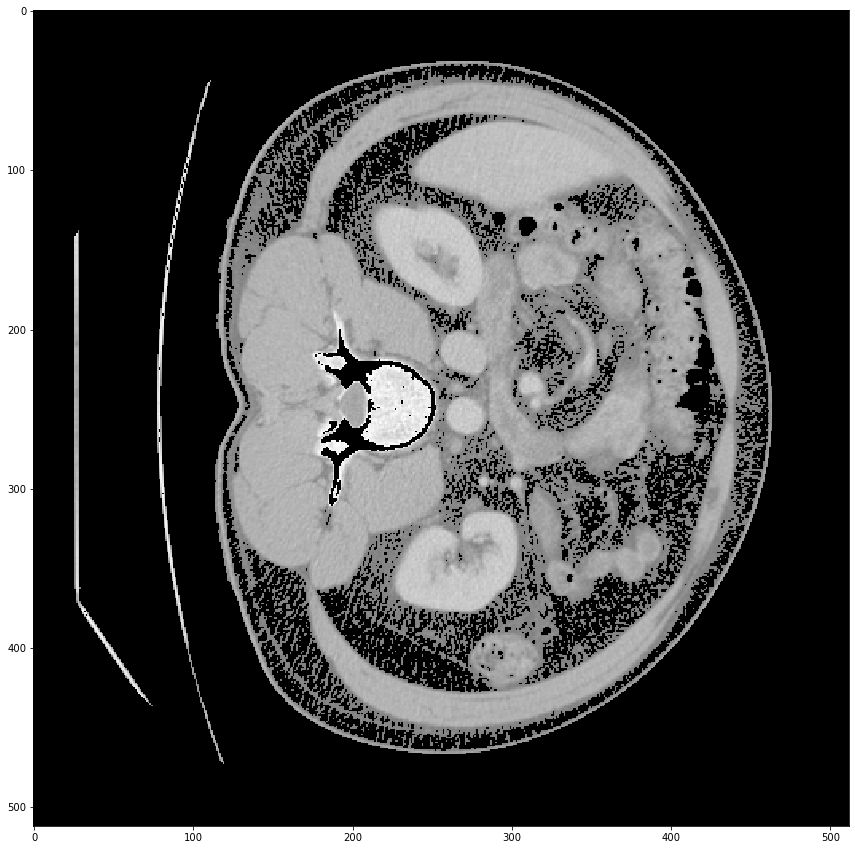

56


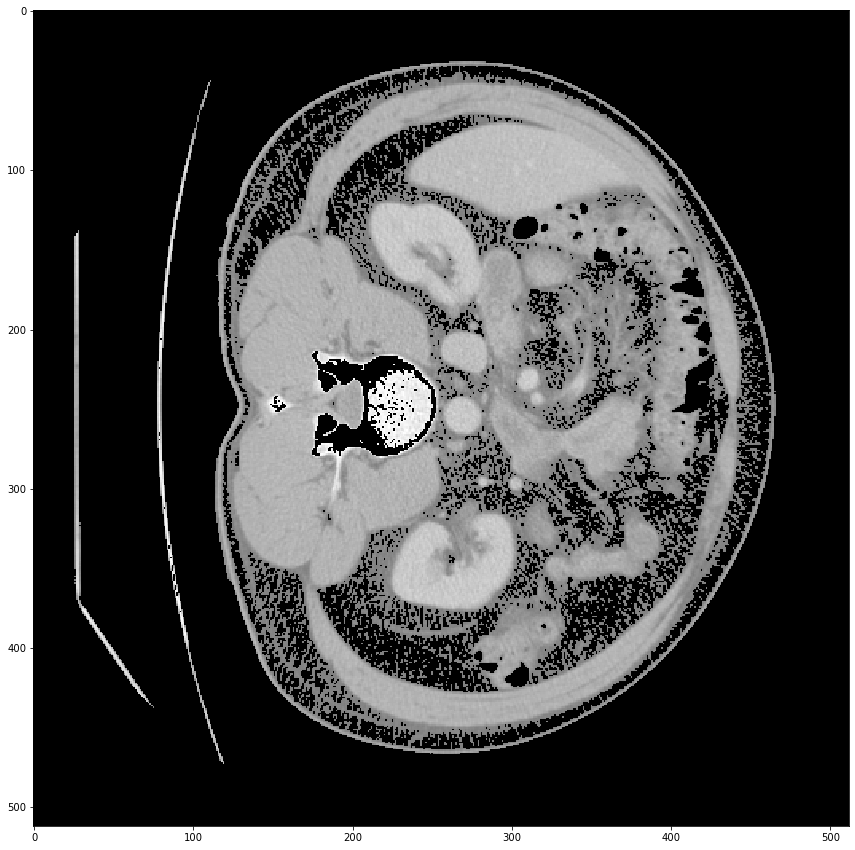

57


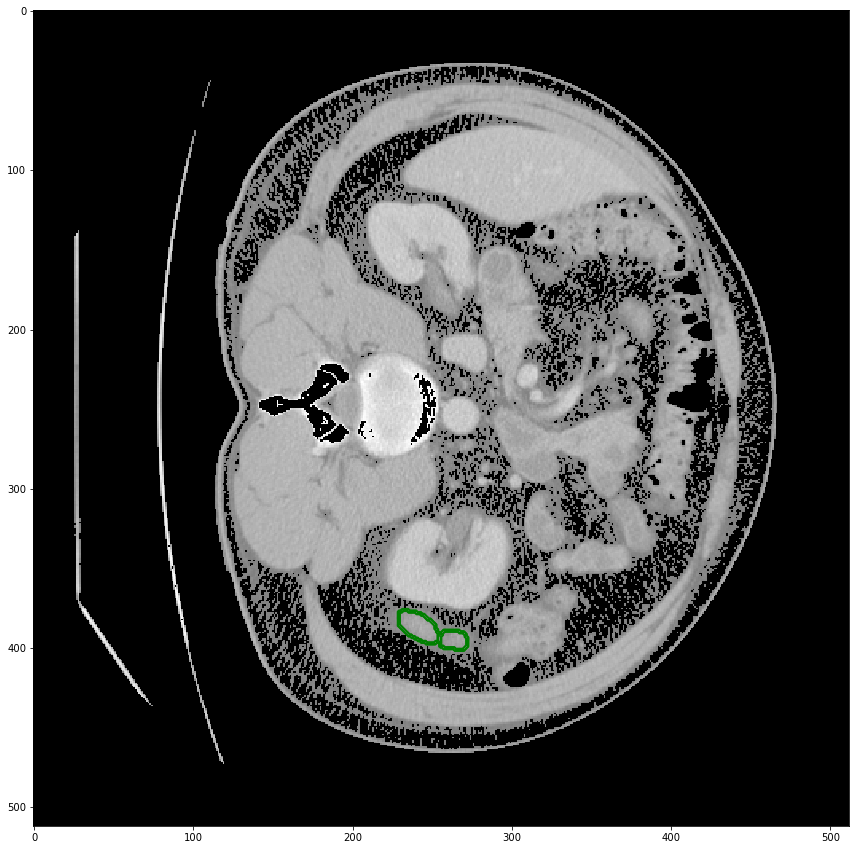

58


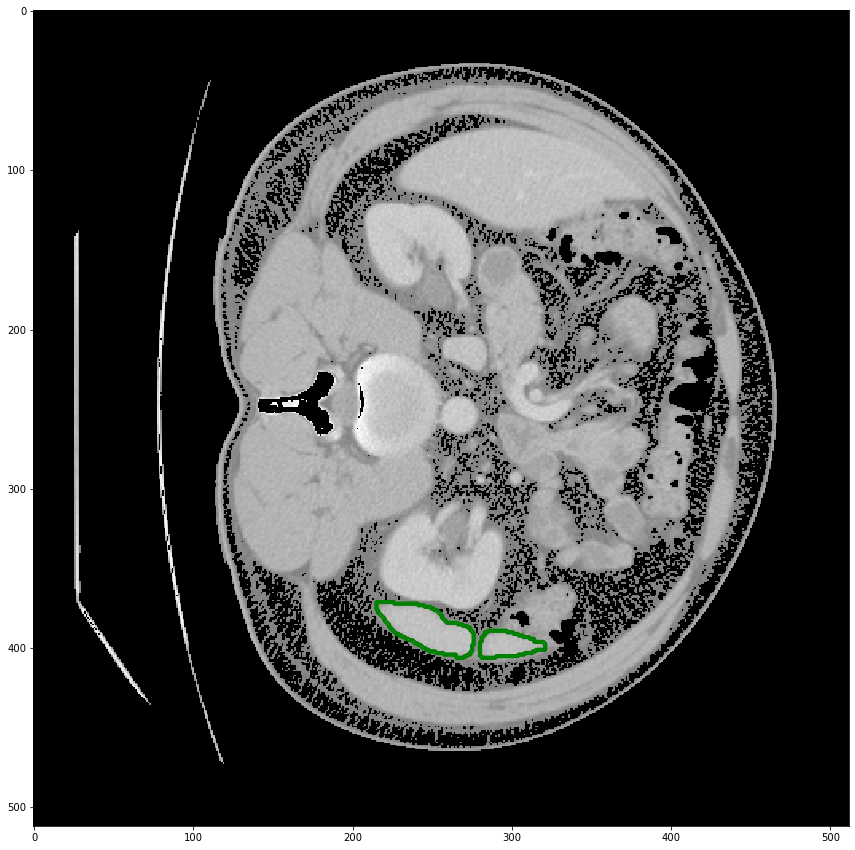

59


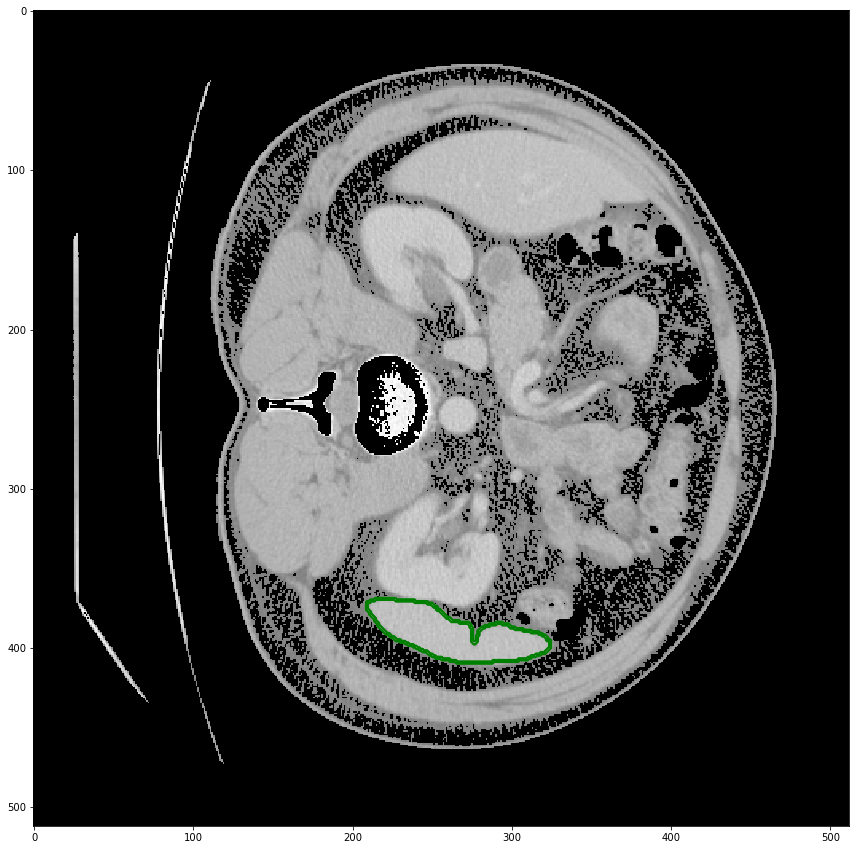

60


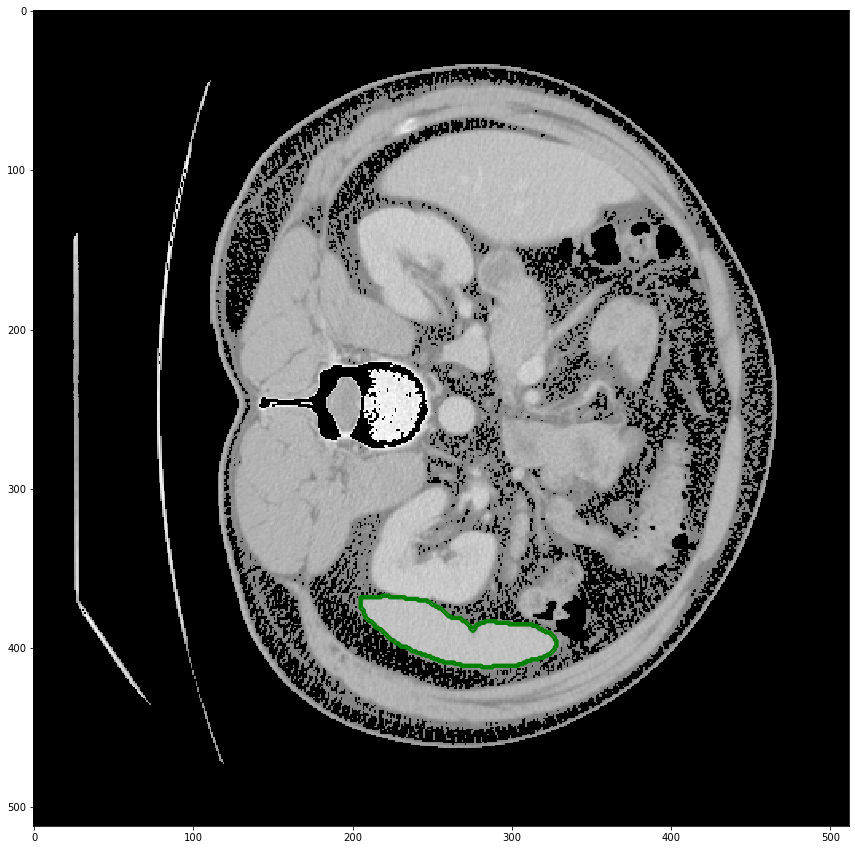

61


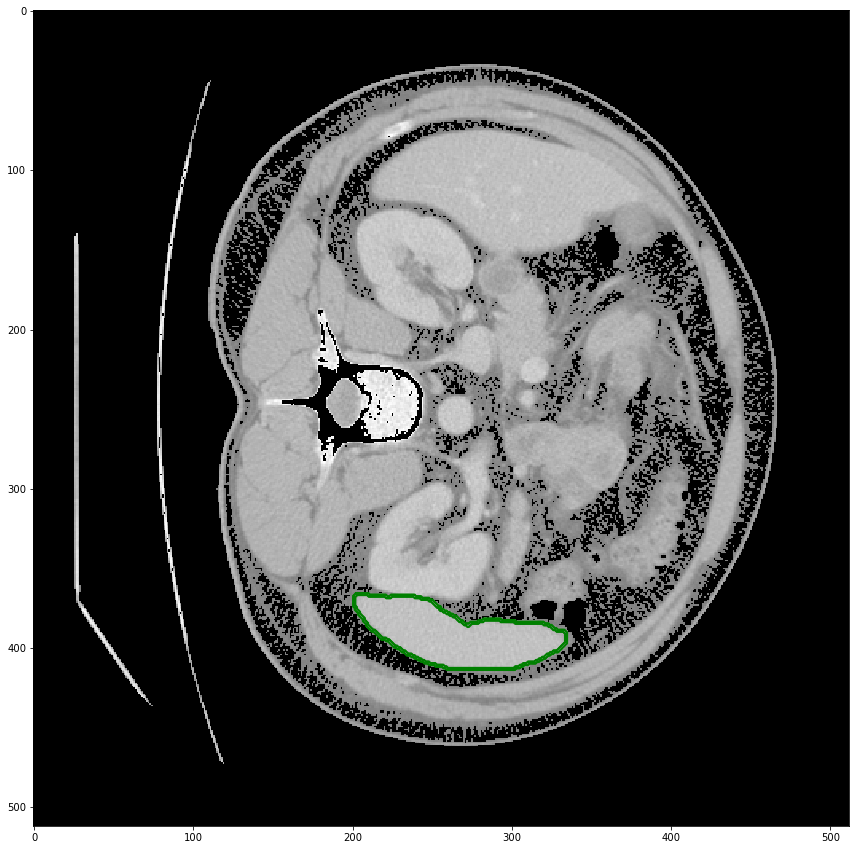

62


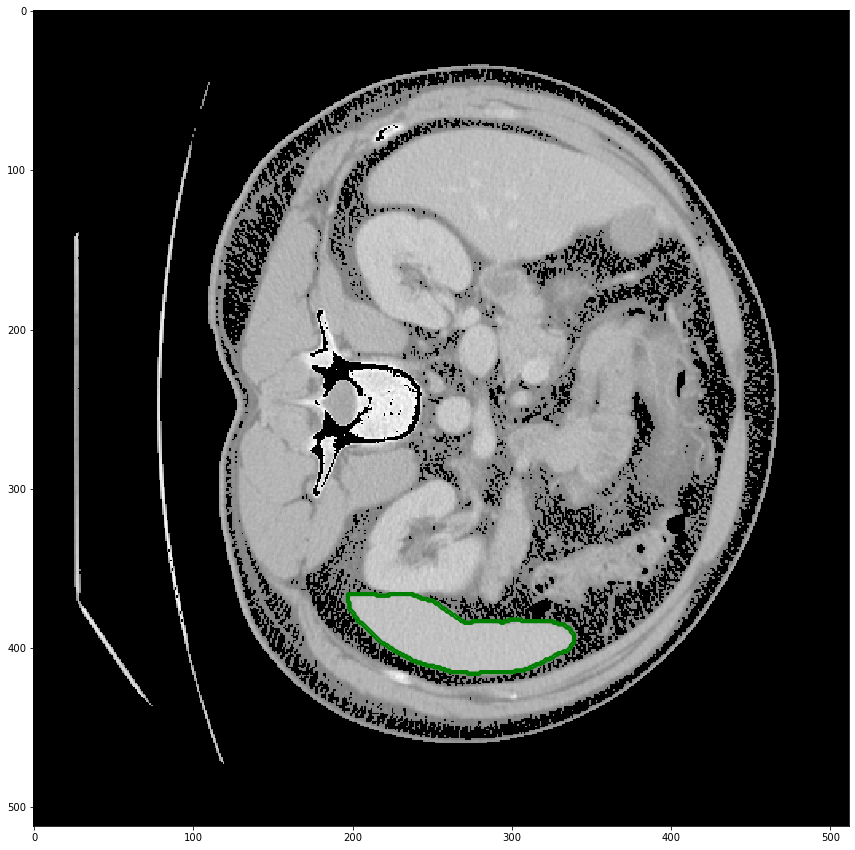

63


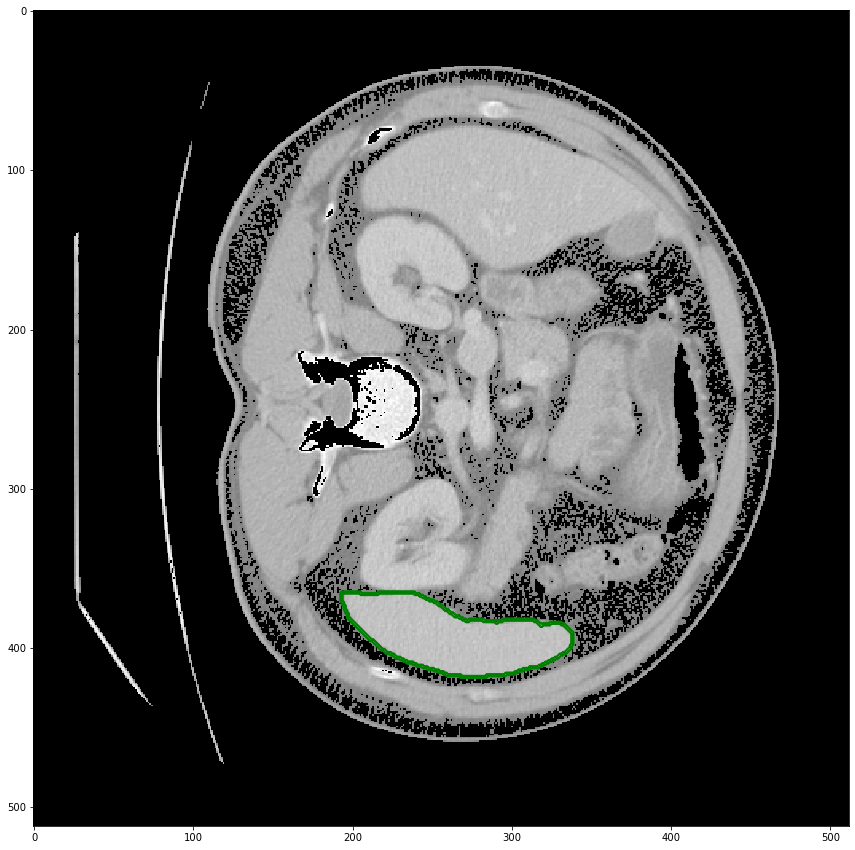

64


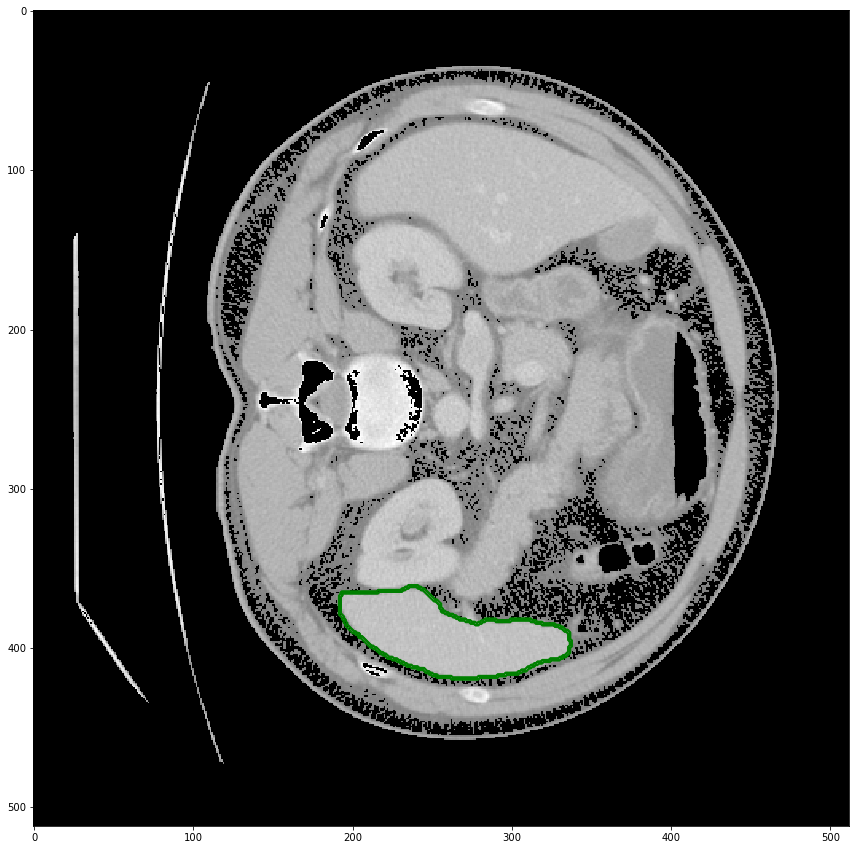

65


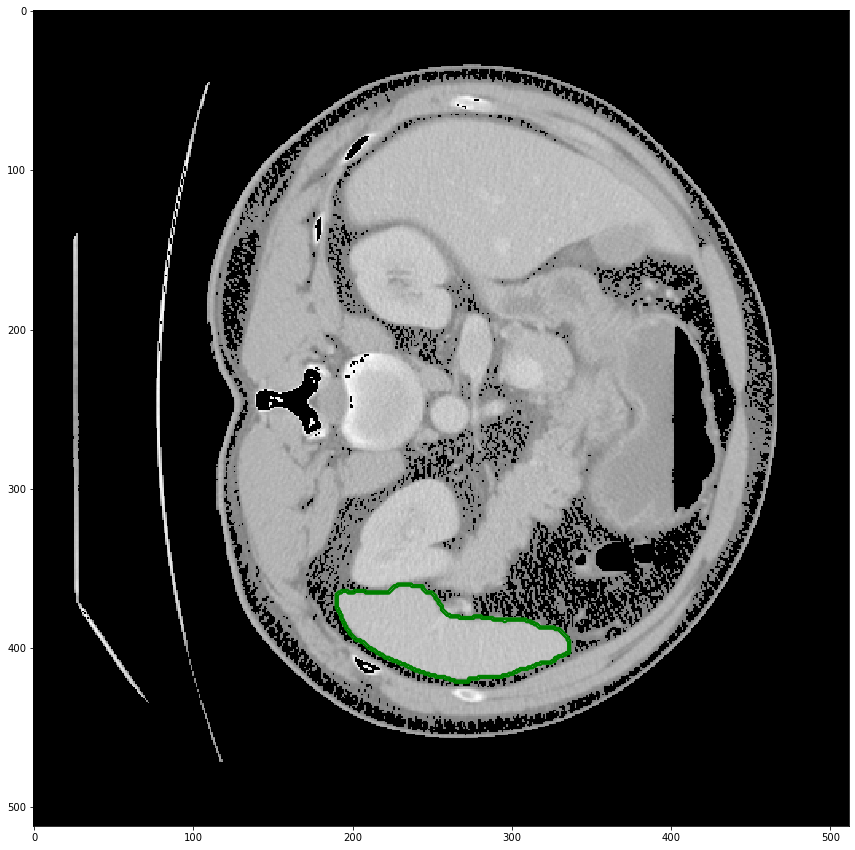

66


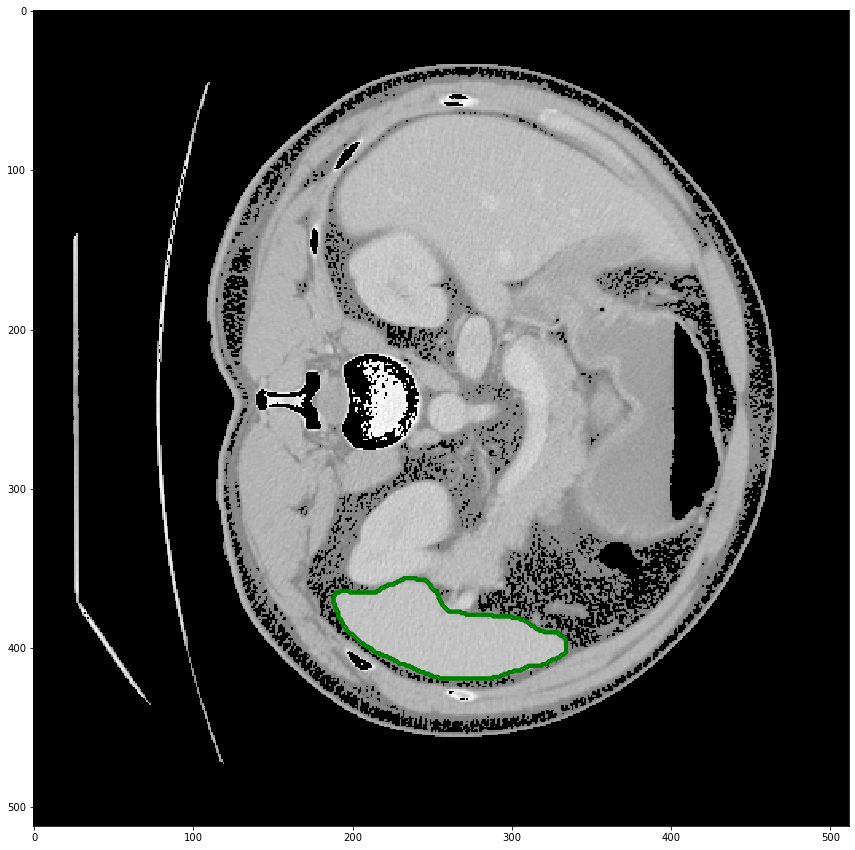

67


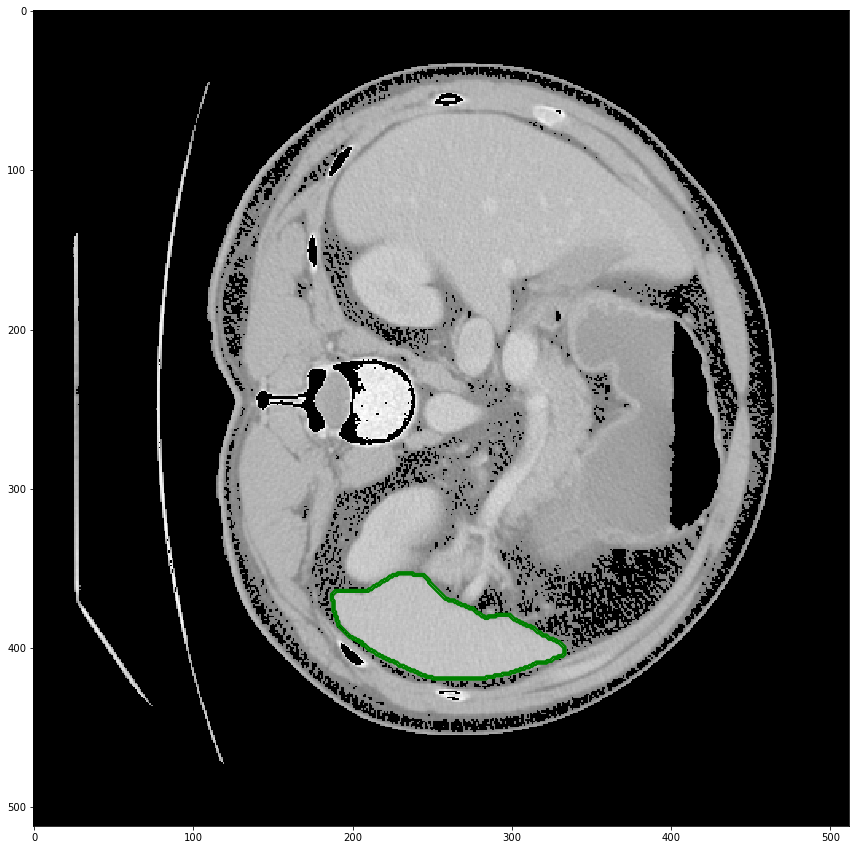

68


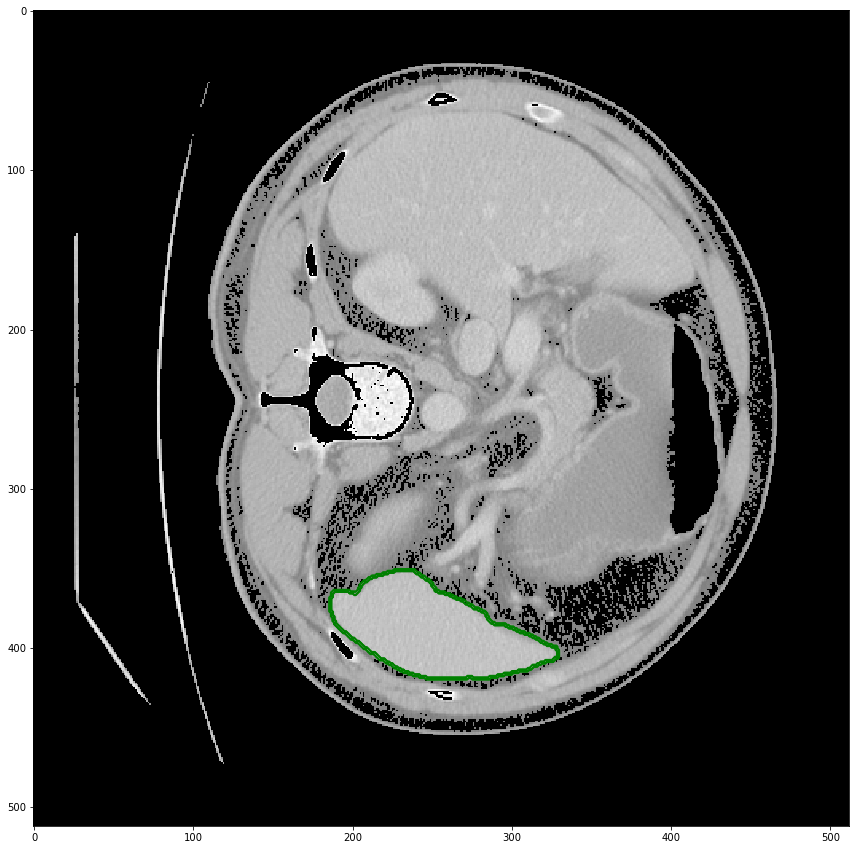

69


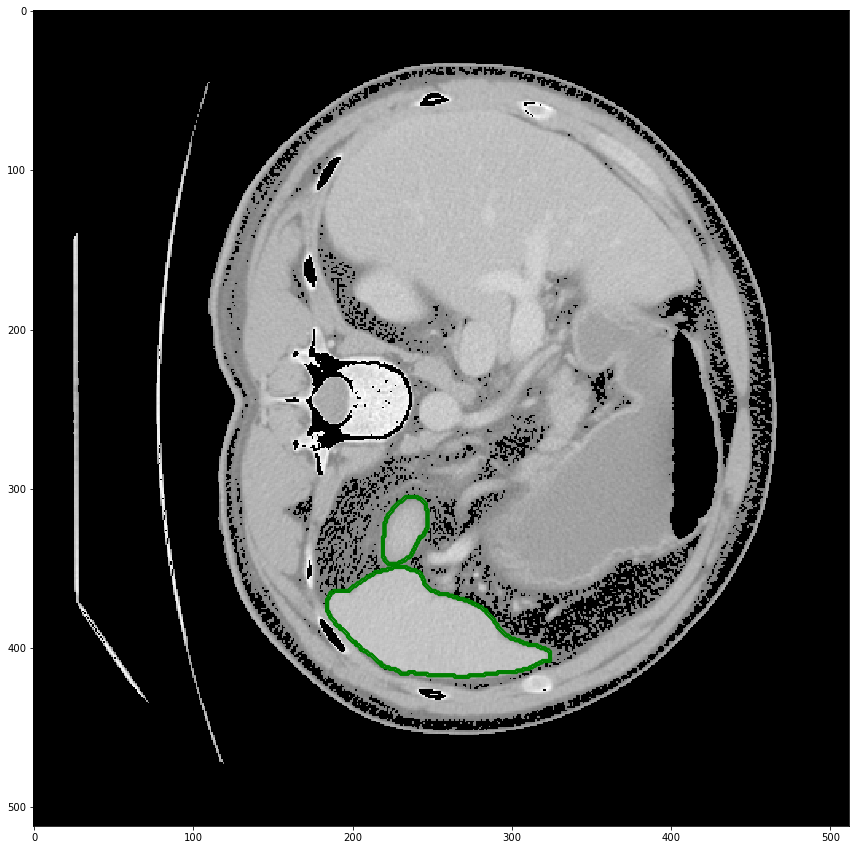

70


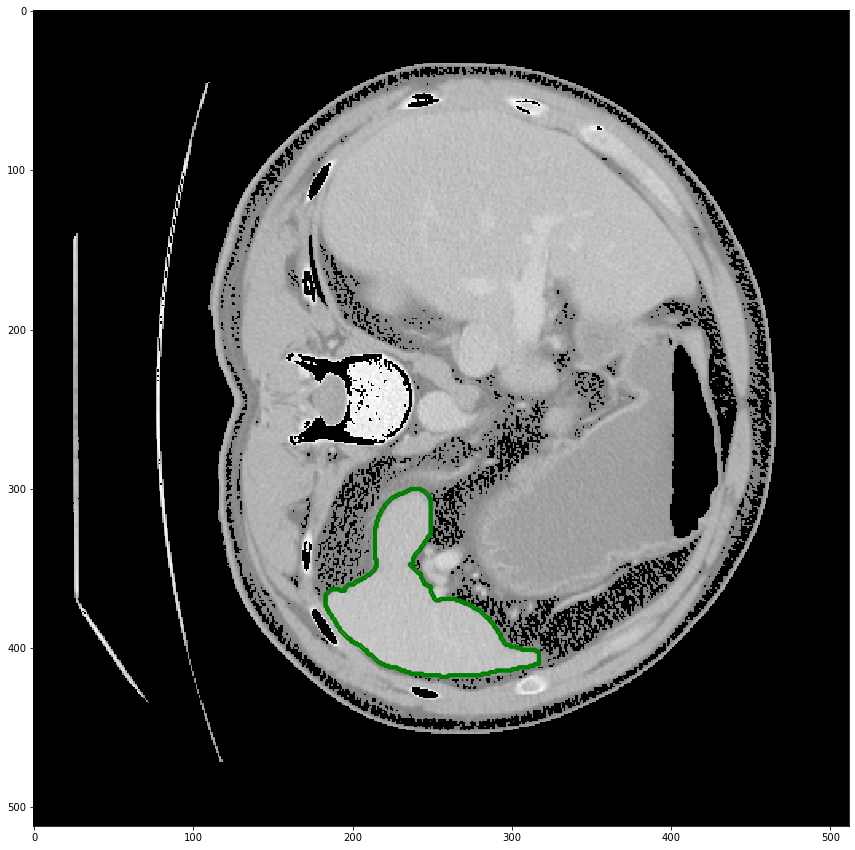

71


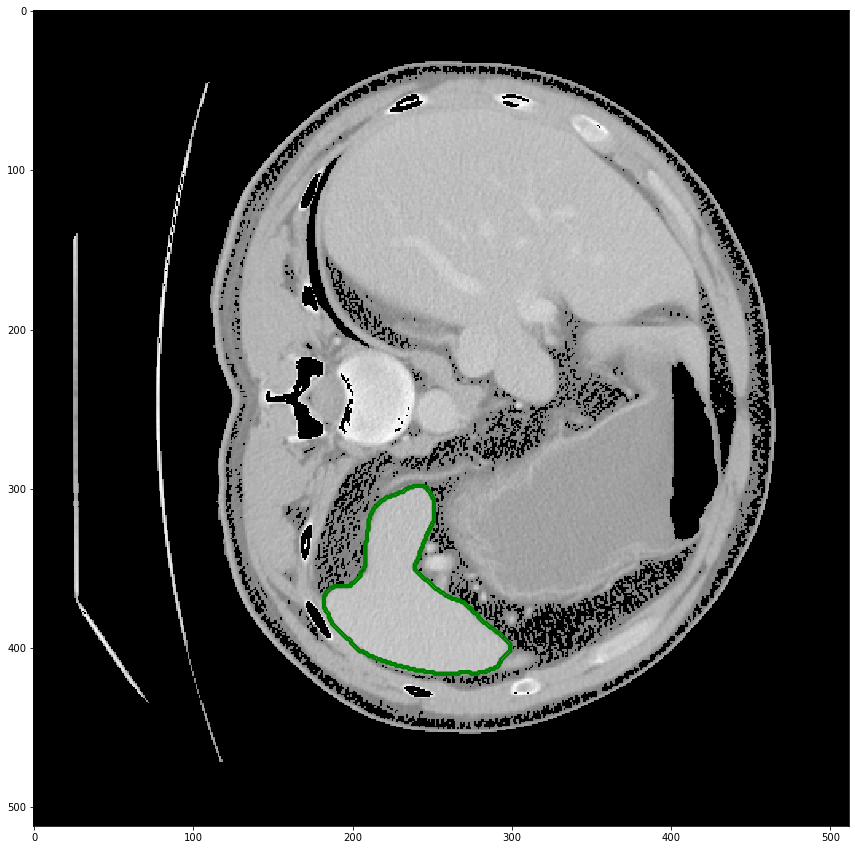

72


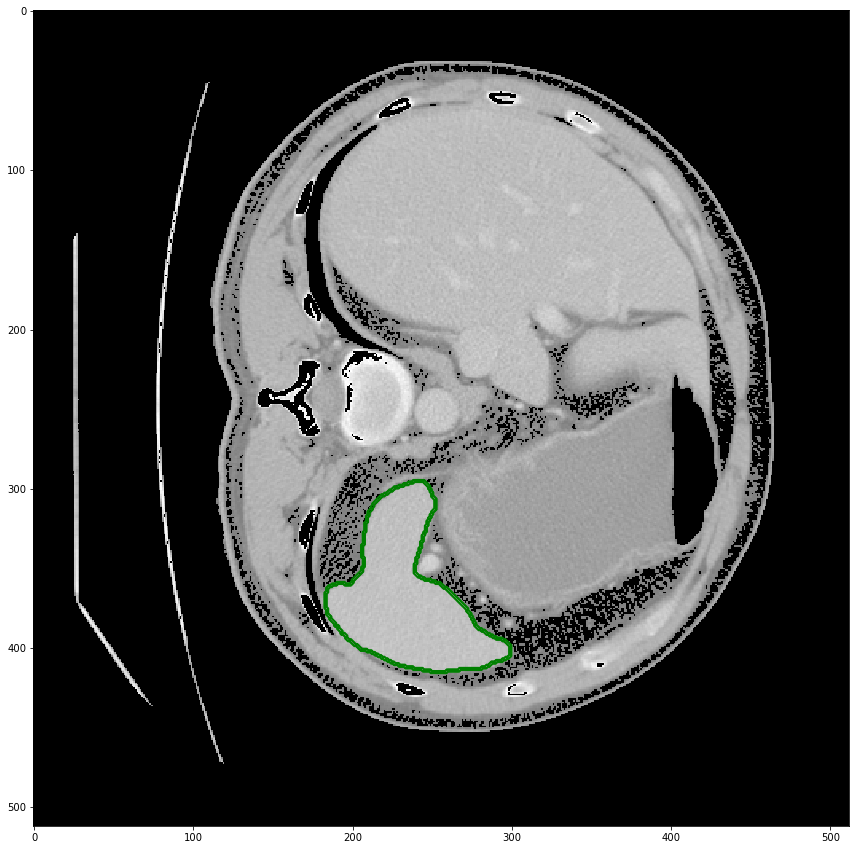

73


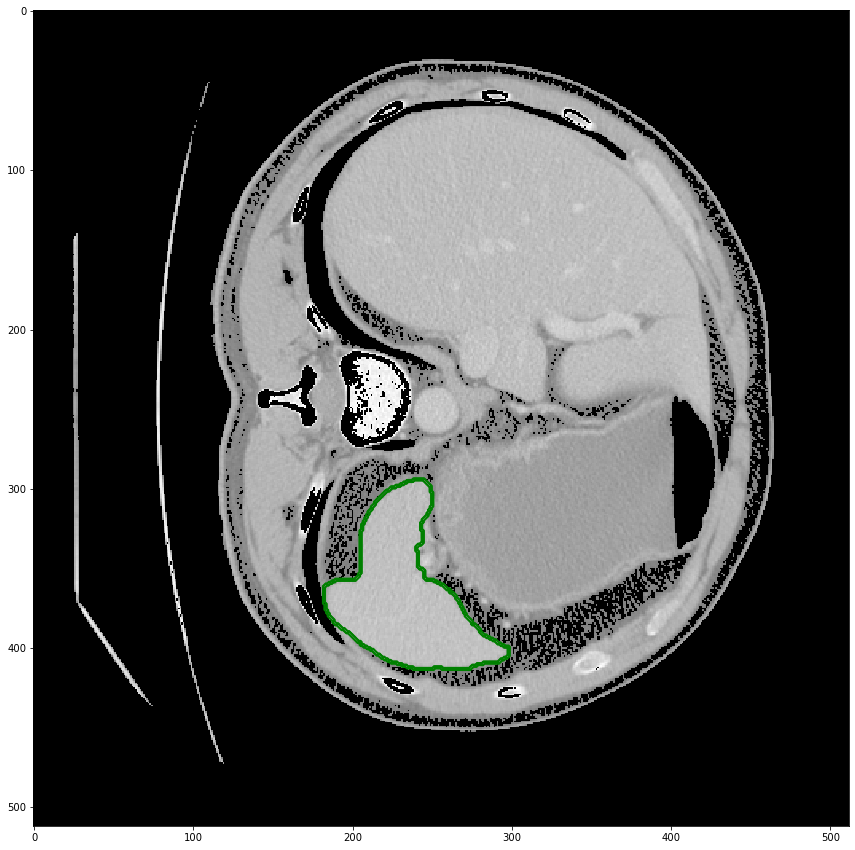

74


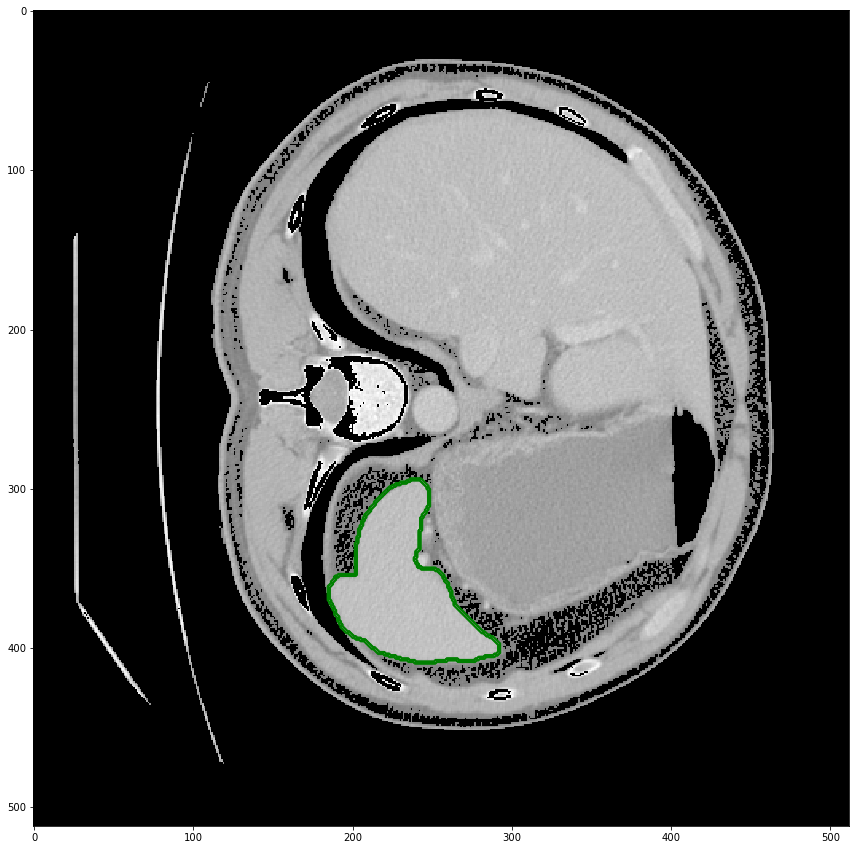

75


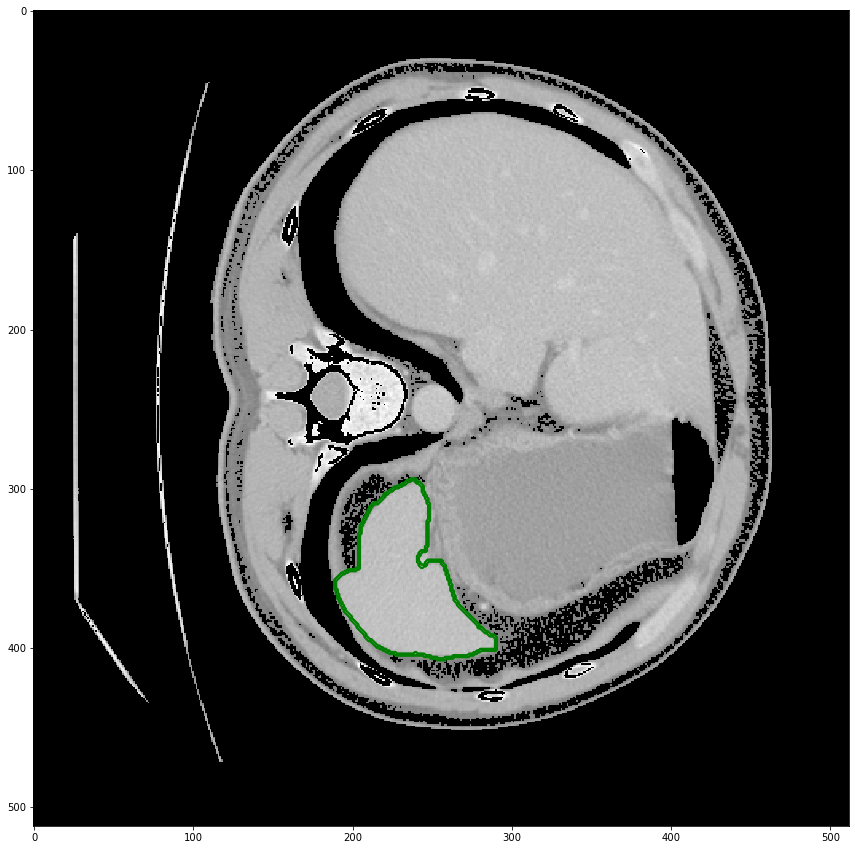

76


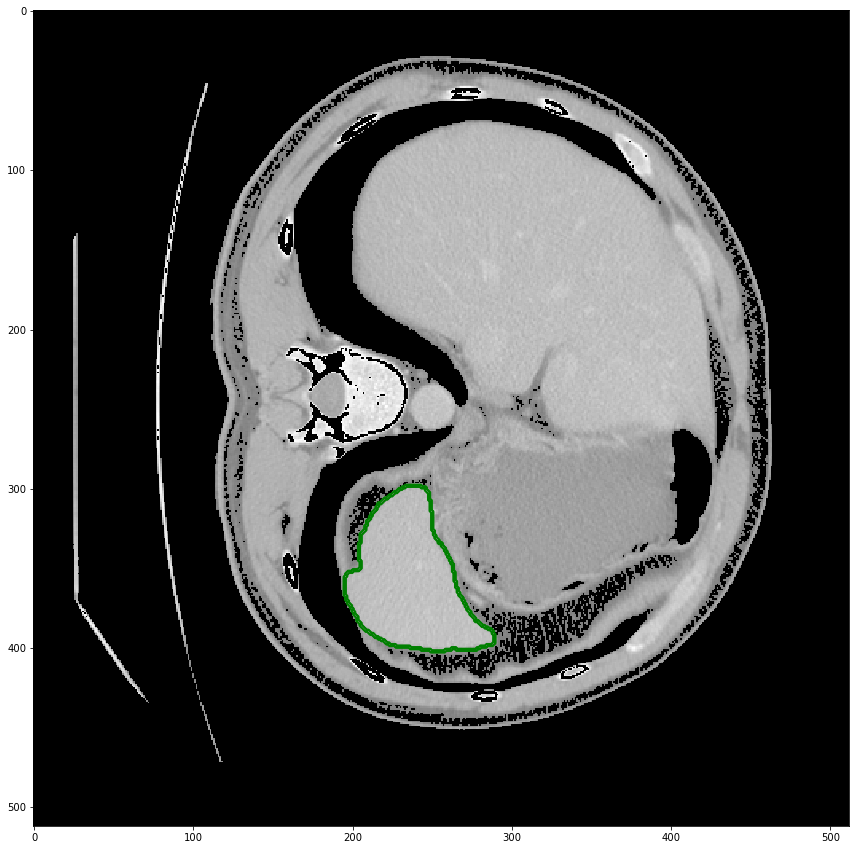

77


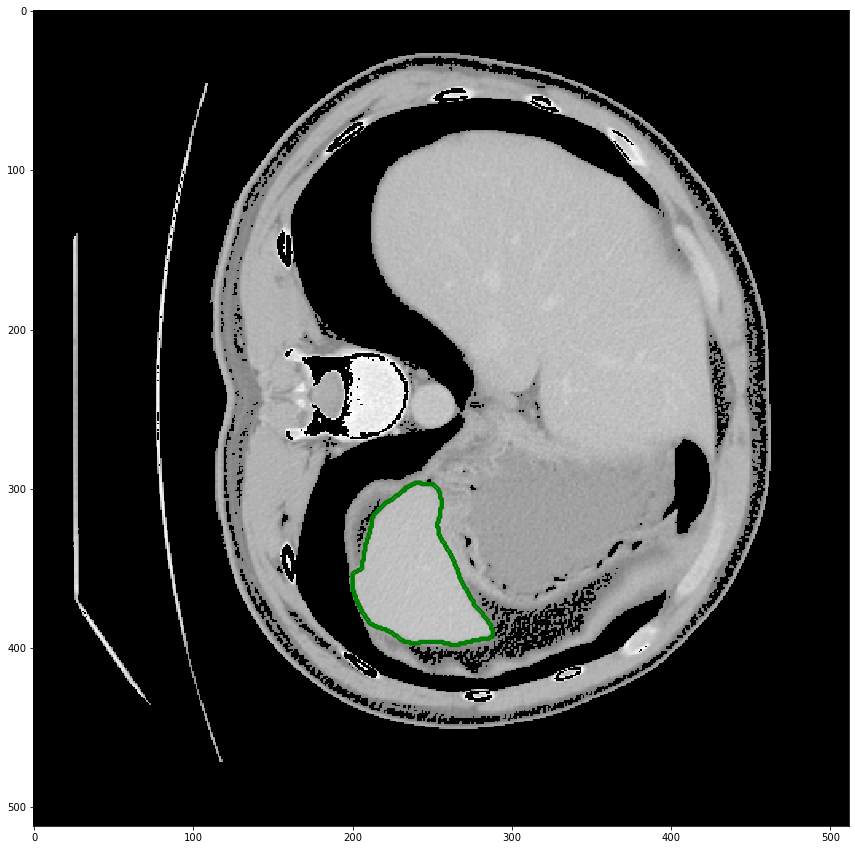

78


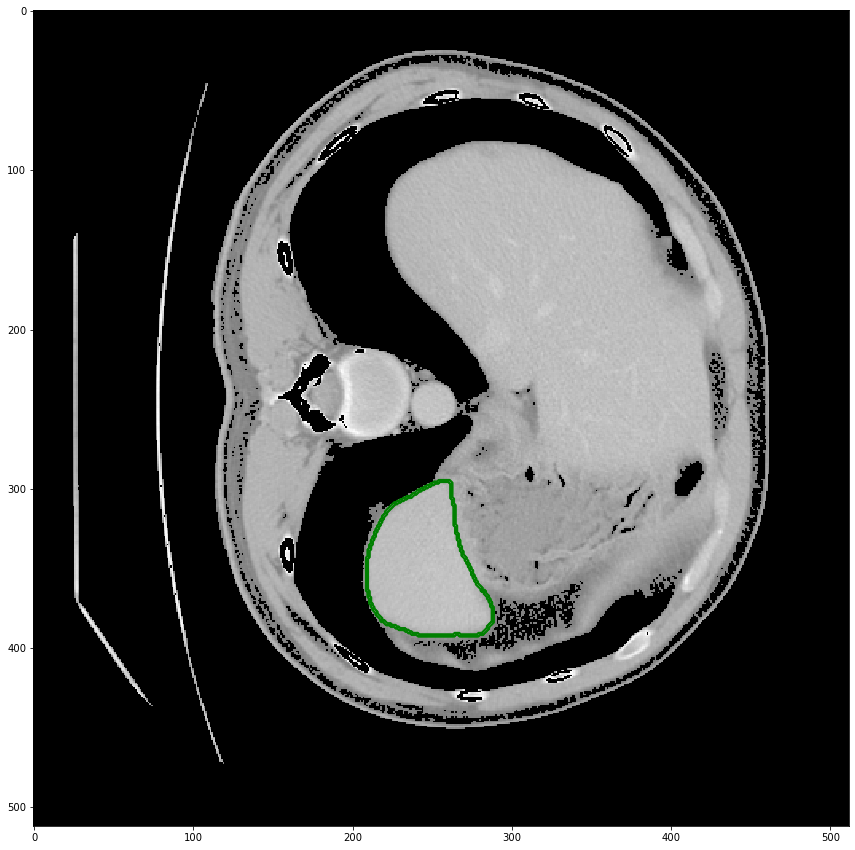

79


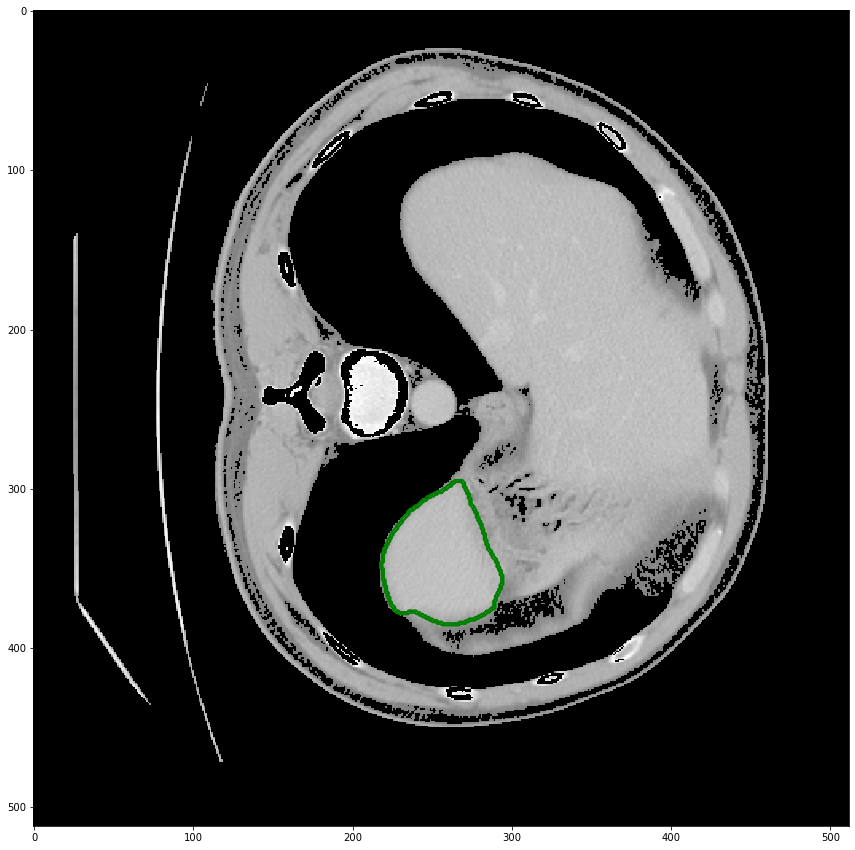

80


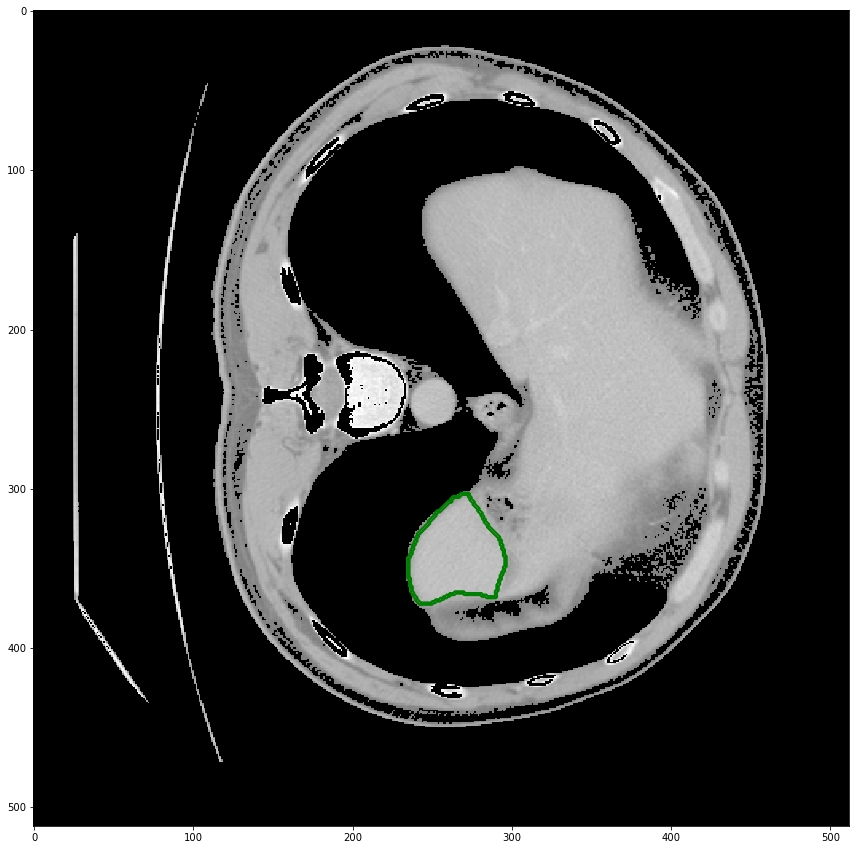

81


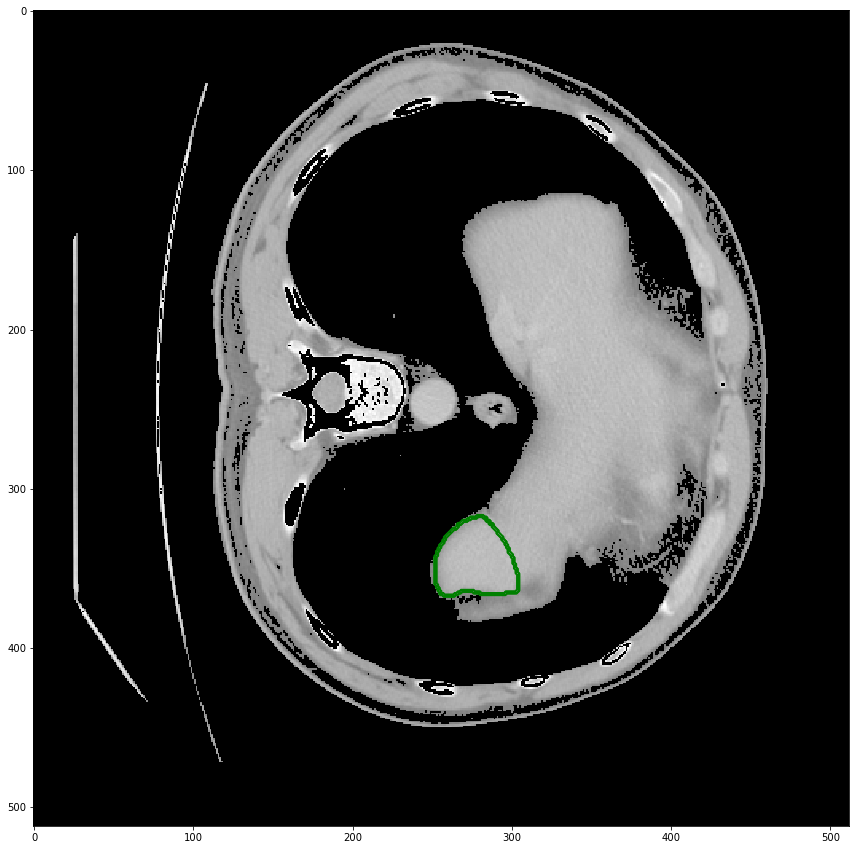

82


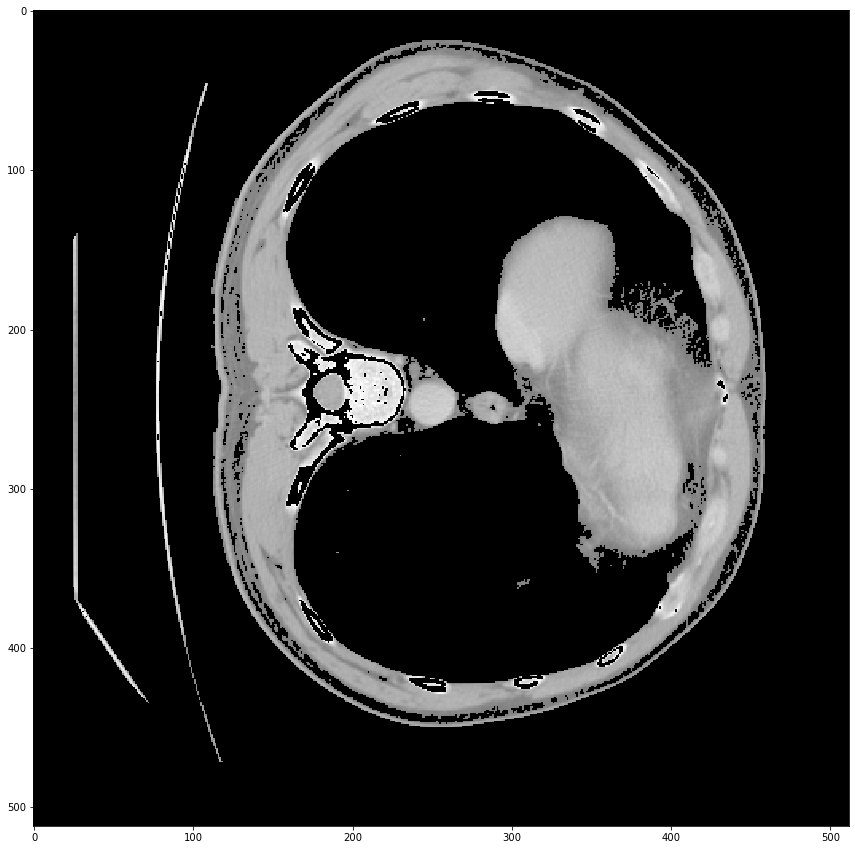

83


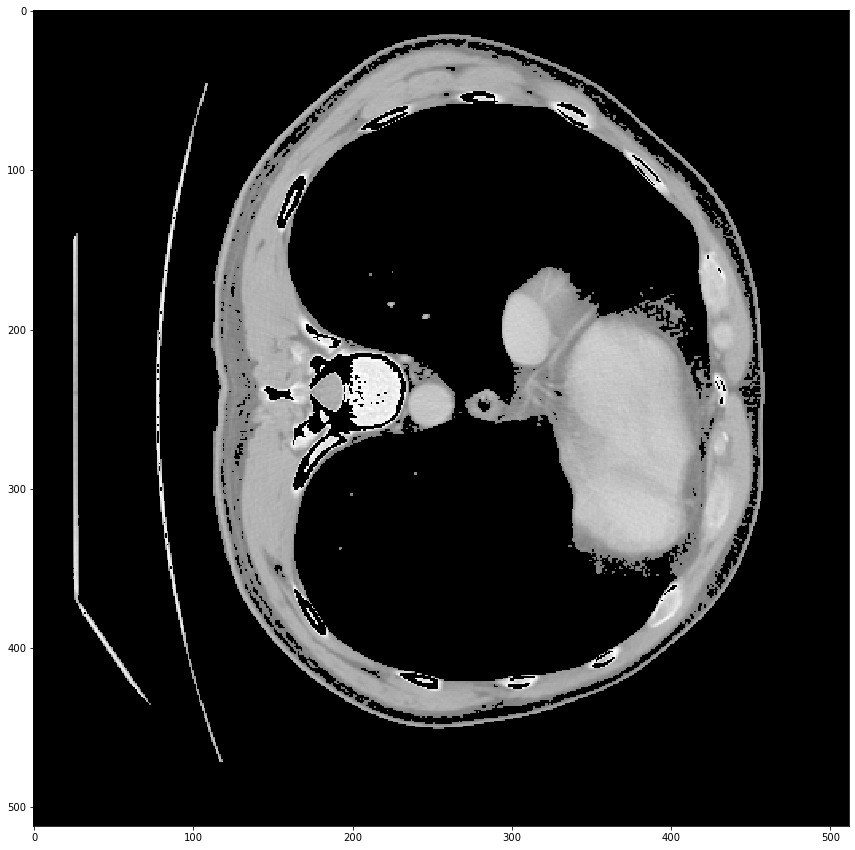

84


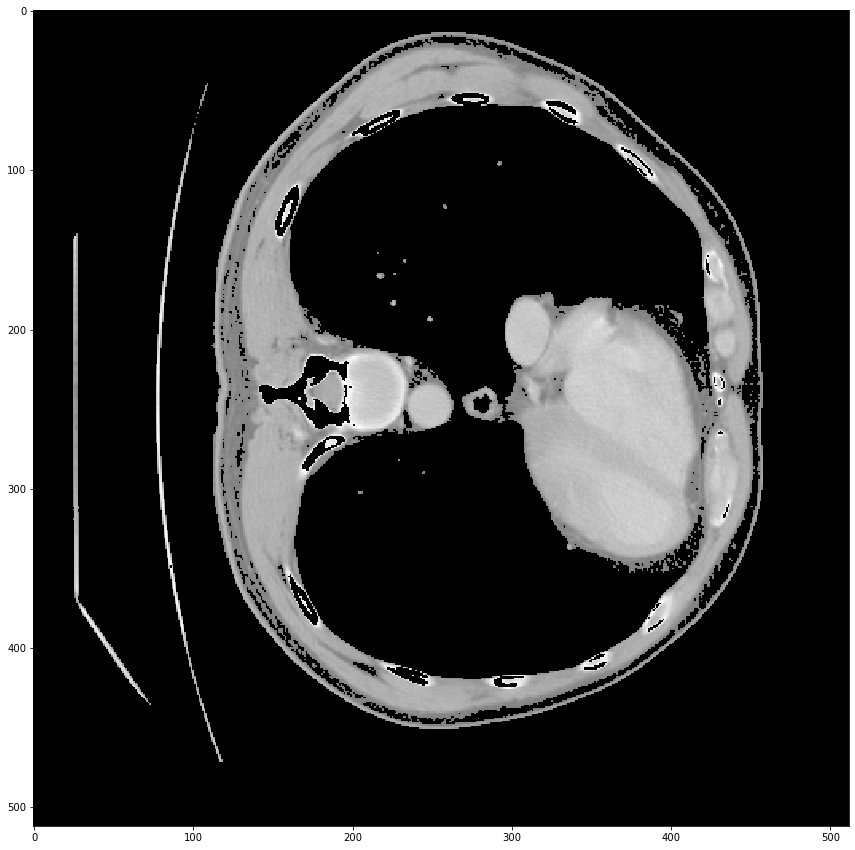

85


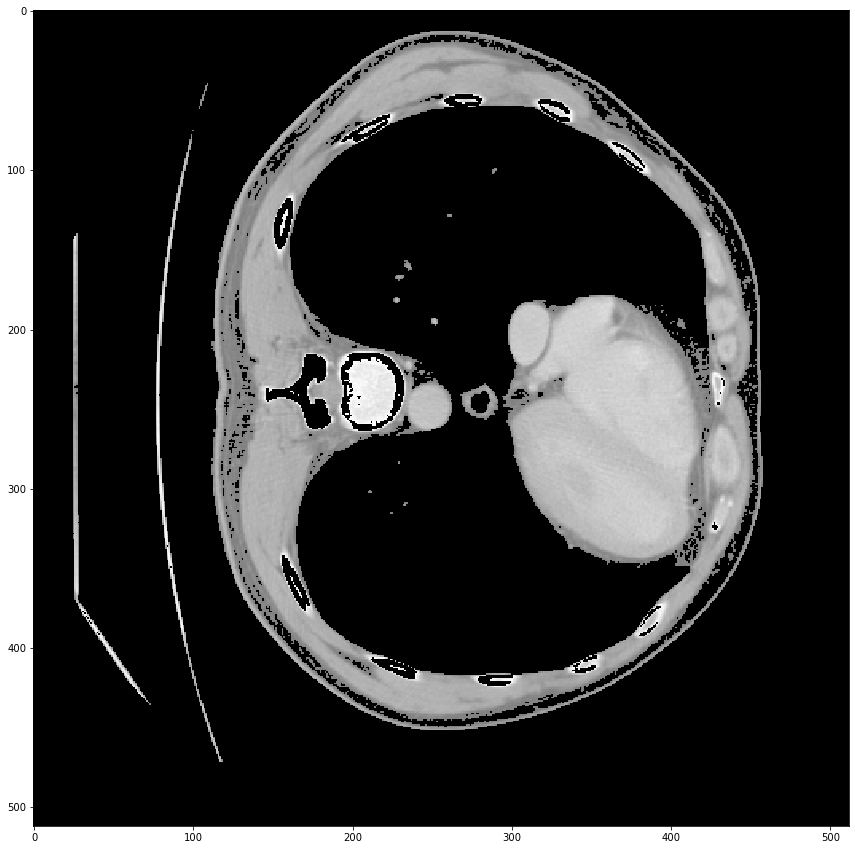

86


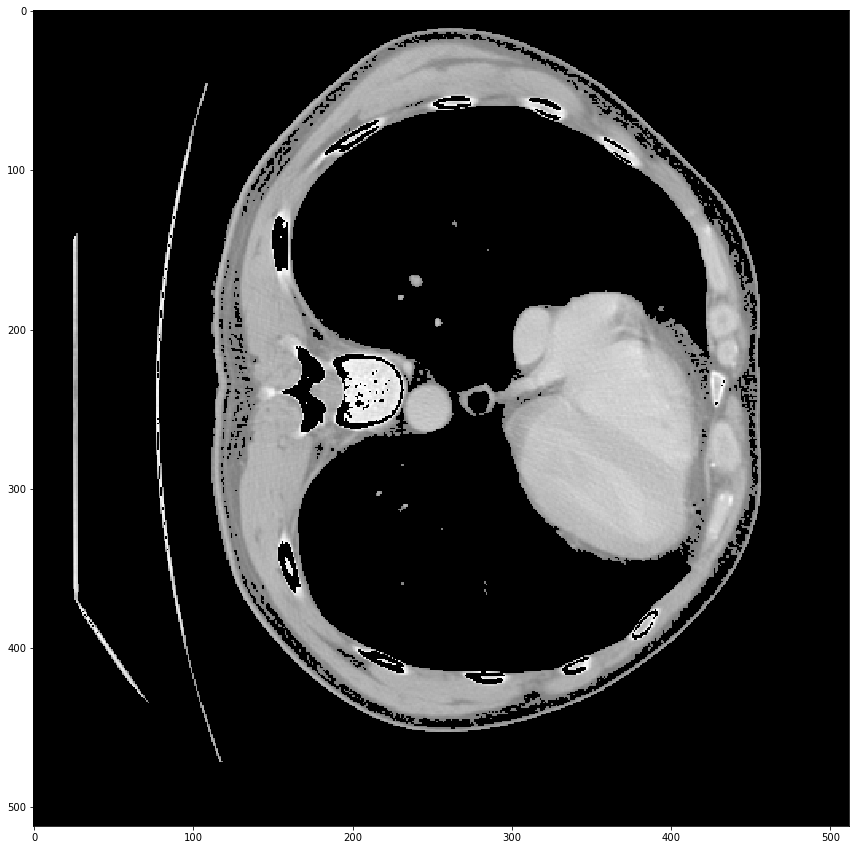

87


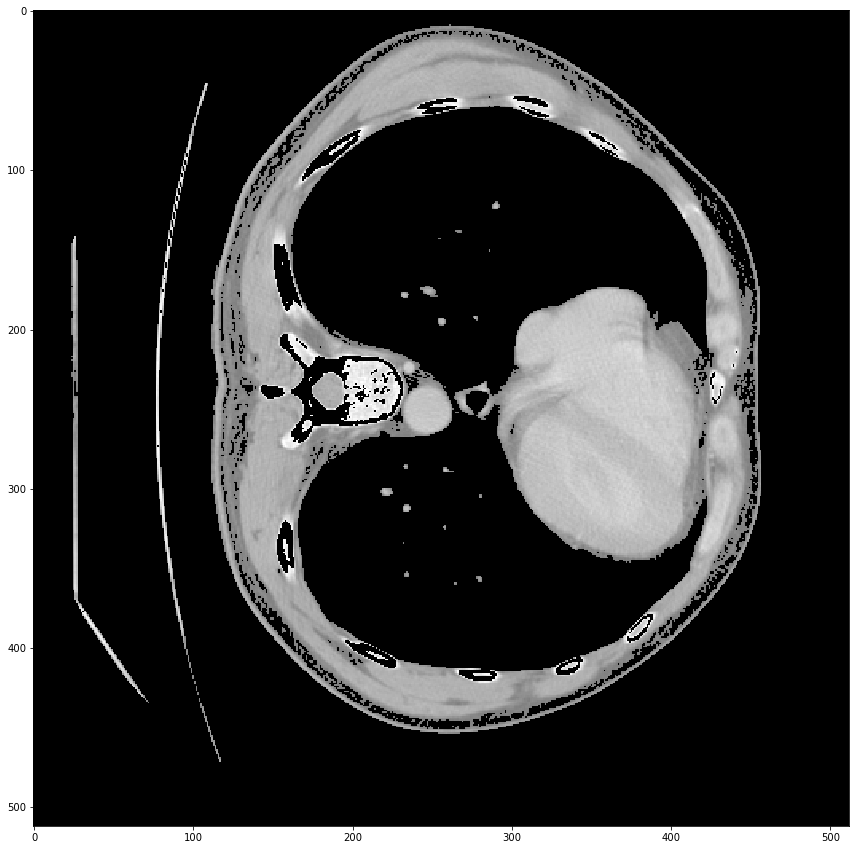

88


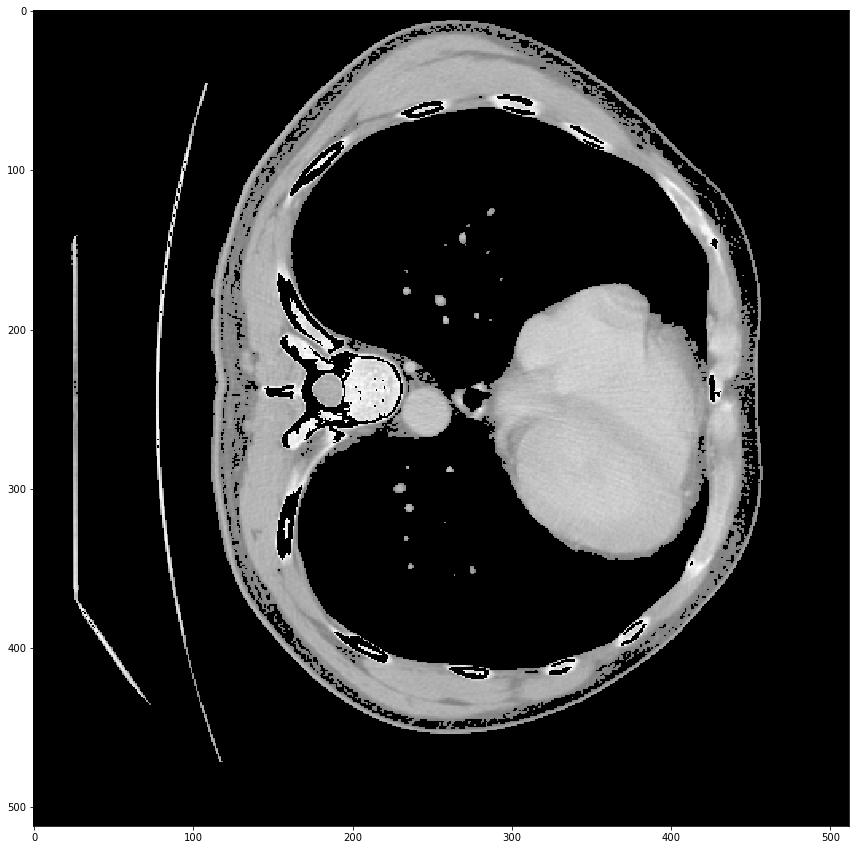

In [44]:
for ind in range(50,89,1):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=1]=0
    label_np_tr_sp_ol = (roberts(label_np_tr_sp > label_np_tr_sp.max() / 2) * 255).astype(np.uint8)
    plt.contour(label_np_tr_sp_ol, colors='green', linewidths=1)
    plt.show()